# Homework 0 - Question 1: Practical Implementation of Low-Rank Image Approximation

**Full Name:** Amirhosein Rezaei

**Student ID:** 401105989

---
In this notebook, we will implement and analyze the concept of Low-Rank Approximation using Singular Value Decomposition (SVD) on an image for various ranks.

---
# Part(E): Image Reconstruction Using SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from numpy.linalg import svd, norm

### 1. Loading Libraries and Sample Image

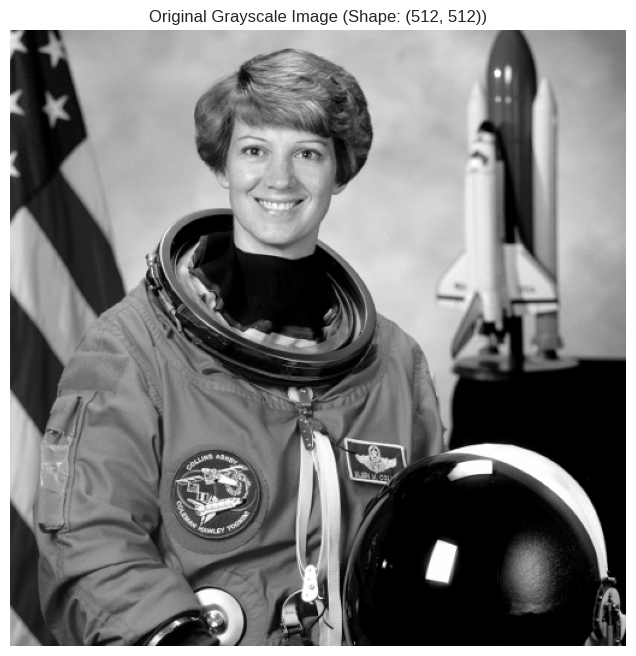

Dimensions of the image matrix A: (512, 512)


In [2]:
# Plotting style settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 8)

# Load a color image
image_color = data.astronaut()

# Convert to grayscale
A = color.rgb2gray(image_color)

# Display the image and its dimensions
plt.imshow(A, cmap='gray')
plt.title(f'Original Grayscale Image (Shape: {A.shape})')
plt.axis('off')
plt.show()

print(f"Dimensions of the image matrix A: {A.shape}")

### 2. Computing the Singular Value Decomposition (SVD)
In this section, you need to decompose the image matrix `A` into its SVD components: `U`, `s`, and `VT`.

In [3]:
# Description: Use the 'svd' function to compute the Singular Value Decomposition of the matrix 'A'.

# TODO: Perform SVD on the matrix 'A'.
U, s, VT = svd(A, full_matrices=False)

print(f"Shape of U: {U.shape}")
print(f"Number of singular values: {s.shape[0]}")
print(f"Shape of VT: {VT.shape}")

Shape of U: (512, 512)
Number of singular values: 512
Shape of VT: (512, 512)


### 3. Image Reconstruction and Error Calculation for Different Ranks (k)
Now, we will reconstruct the image and calculate the approximation error for a list of different ranks: `k_values`. This will help us understand the trade-off between compression and image quality.

In [4]:
k_values = [5, 15, 30, 50, 100]
reconstructed_images = []

for k in k_values:
    print(f'--- Analyzing for k = {k} ---')

    # Description: To build the approximated matrix A_k, you need to select the first k columns of U,
    # the first k singular values, and the first k rows of VT.

    # TODO: Reconstruct the image matrix A_k using the top k SVD components.
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    reconstructed_images.append(A_k)

    # TODO: Calculate the practical error (||A - A_k||_2).
    practical_error = norm(A - A_k, 2)

    # TODO: Extract the theoretical error (sigma_{k+1}). Remember 0-based indexing.
    theoretical_error = s[k] if k < len(s) else 0

    print(f"Practical Error (||A - A_k||_2): {practical_error}")
    print(f"Theoretical Error (sigma_{k+1}): {theoretical_error}\n")

--- Analyzing for k = 5 ---
Practical Error (||A - A_k||_2): 29.98925186198412
Theoretical Error (sigma_6): 29.989251861984098

--- Analyzing for k = 15 ---
Practical Error (||A - A_k||_2): 11.453026420355306
Theoretical Error (sigma_16): 11.453026420355307

--- Analyzing for k = 30 ---
Practical Error (||A - A_k||_2): 6.188232950337849
Theoretical Error (sigma_31): 6.188232950337846

--- Analyzing for k = 50 ---
Practical Error (||A - A_k||_2): 3.8792530366929956
Theoretical Error (sigma_51): 3.879253036692998

--- Analyzing for k = 100 ---
Practical Error (||A - A_k||_2): 1.7089599171771126
Theoretical Error (sigma_101): 1.7089599171771113



### 4. Visual Comparison of Reconstructed Images
Let's display the original image and all the reconstructed images side-by-side to visually assess the quality.

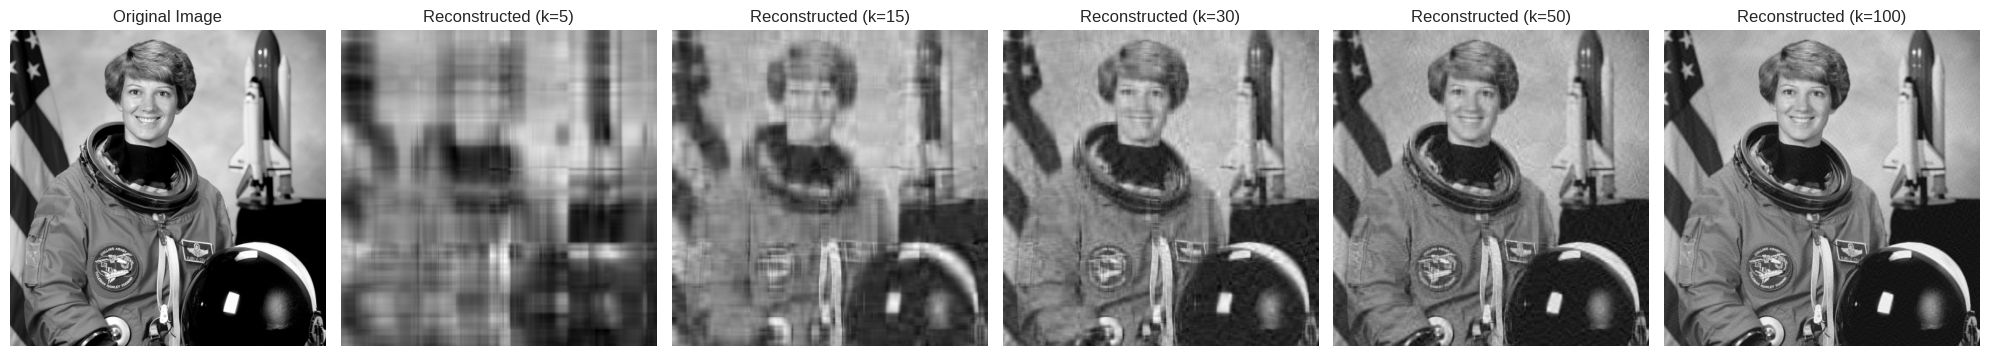

In [5]:
# Display the results
n_images = len(k_values)
fig, axes = plt.subplots(1, n_images + 1, figsize=(20, 5))

# Plot Original
axes[0].imshow(A, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot Reconstructed Images
for i, (k, recon_img) in enumerate(zip(k_values, reconstructed_images)):
    axes[i+1].imshow(recon_img, cmap='gray')
    axes[i+1].set_title(f'Reconstructed (k={k})')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

### 5. Final Analysis
**TODO:** Analyze the results you obtained.
1. Explain how the image quality changes as `k` increases.

as k increases, the reconstructed image becomes better and more similar to the orifinal image and in small k, the image is blurry and only cptures general shapes and in large k, we can see teh details and edges are recovered.

2. Discuss the relationship between the practical and theoretical errors for each `k`.

they are closely matches each others and confrims the part c of theorem assignment and that give the minimum possible spectral error.

3. Describe the trade-off between image compression (related to the value of `k`) and visual quality.

increasing k improves quality but also becuse of less compression it increases storage and optimal k depends on balancing image quality and storage efficiency and can enable efficient compression with contrlled loss in quality.